교수님 요청사항 : 거래량을 Plot하자

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# effect of shares를 끝까지 제거 / Stable coin을 제거한 2 데이터셋을 사용하자
mktcap = pd.read_pickle("ryu_new_mktcap9.pickle")
vol = pd.read_pickle("ryu_new_volume9.pickle")

In [3]:
# 컬럼 수 확인
for i in [mktcap, vol]:
    print(len(i.columns))

9406
9406


### Volume을 Plot 해보자

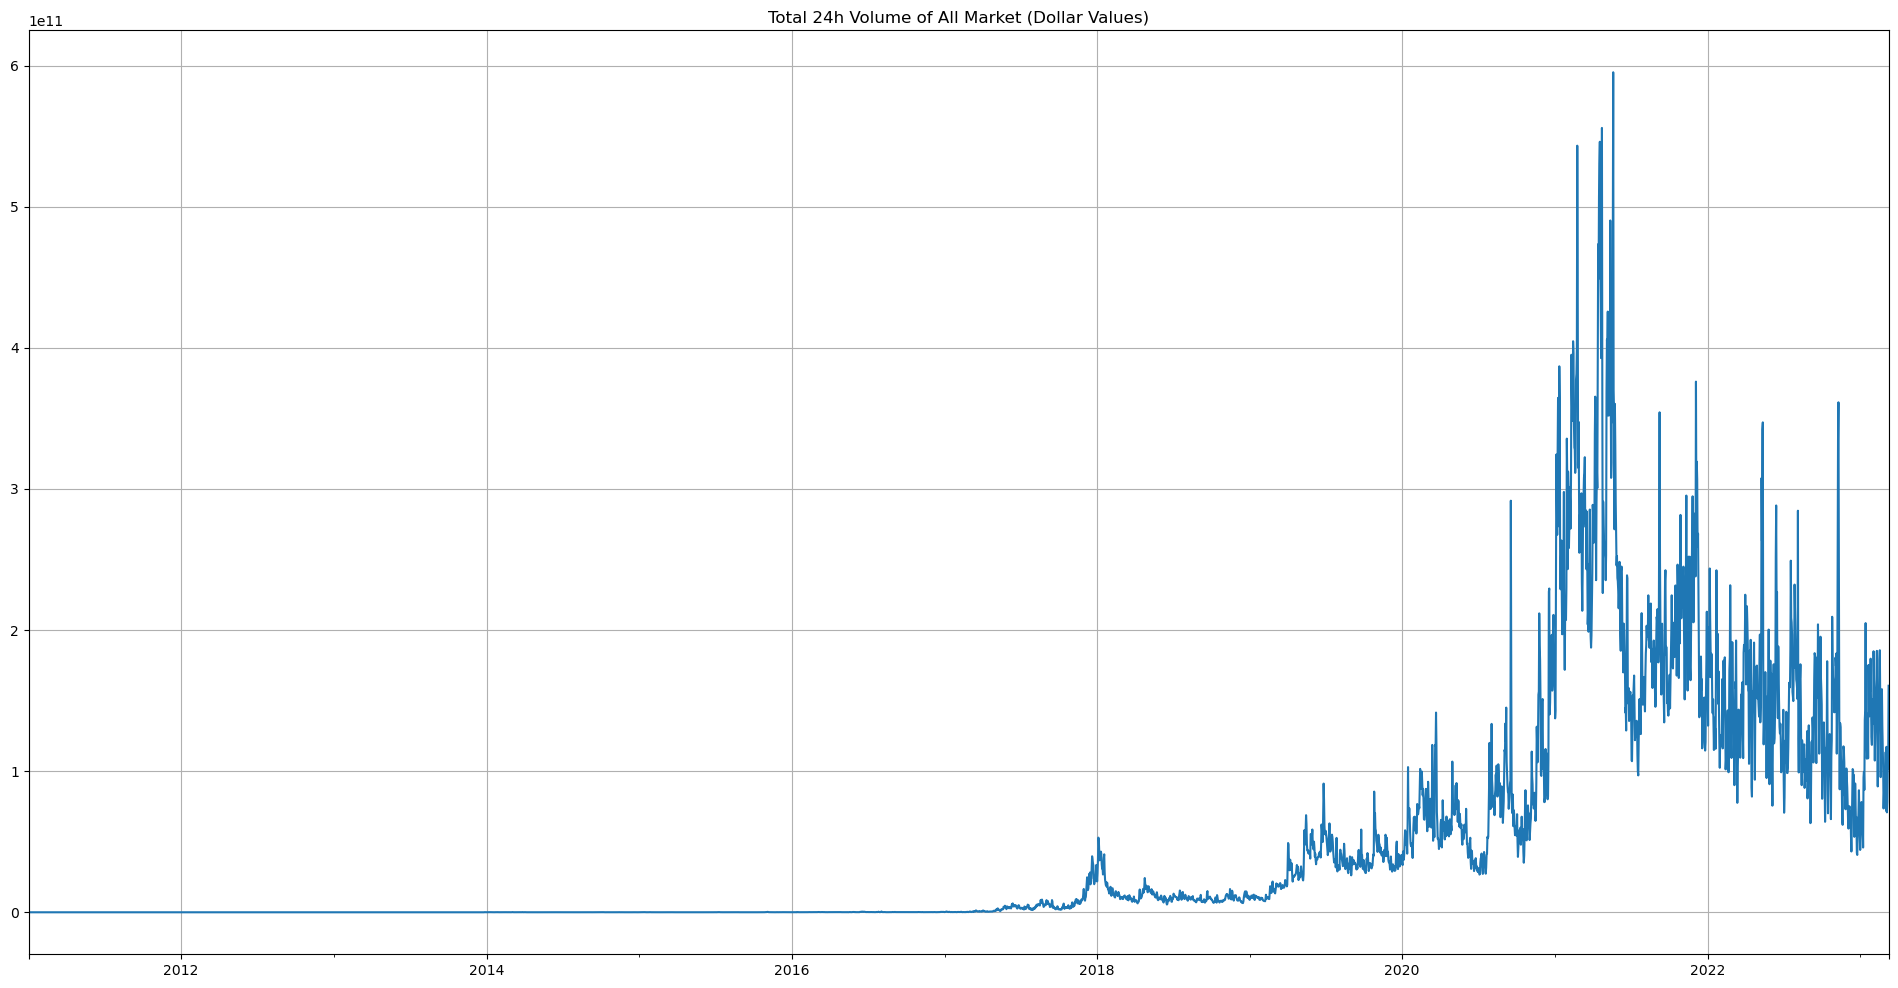

In [13]:
(vol.sum(1)).plot(figsize=(24,12))
plt.title("Total 24h Volume of All Market (Dollar Values)")
plt.grid();

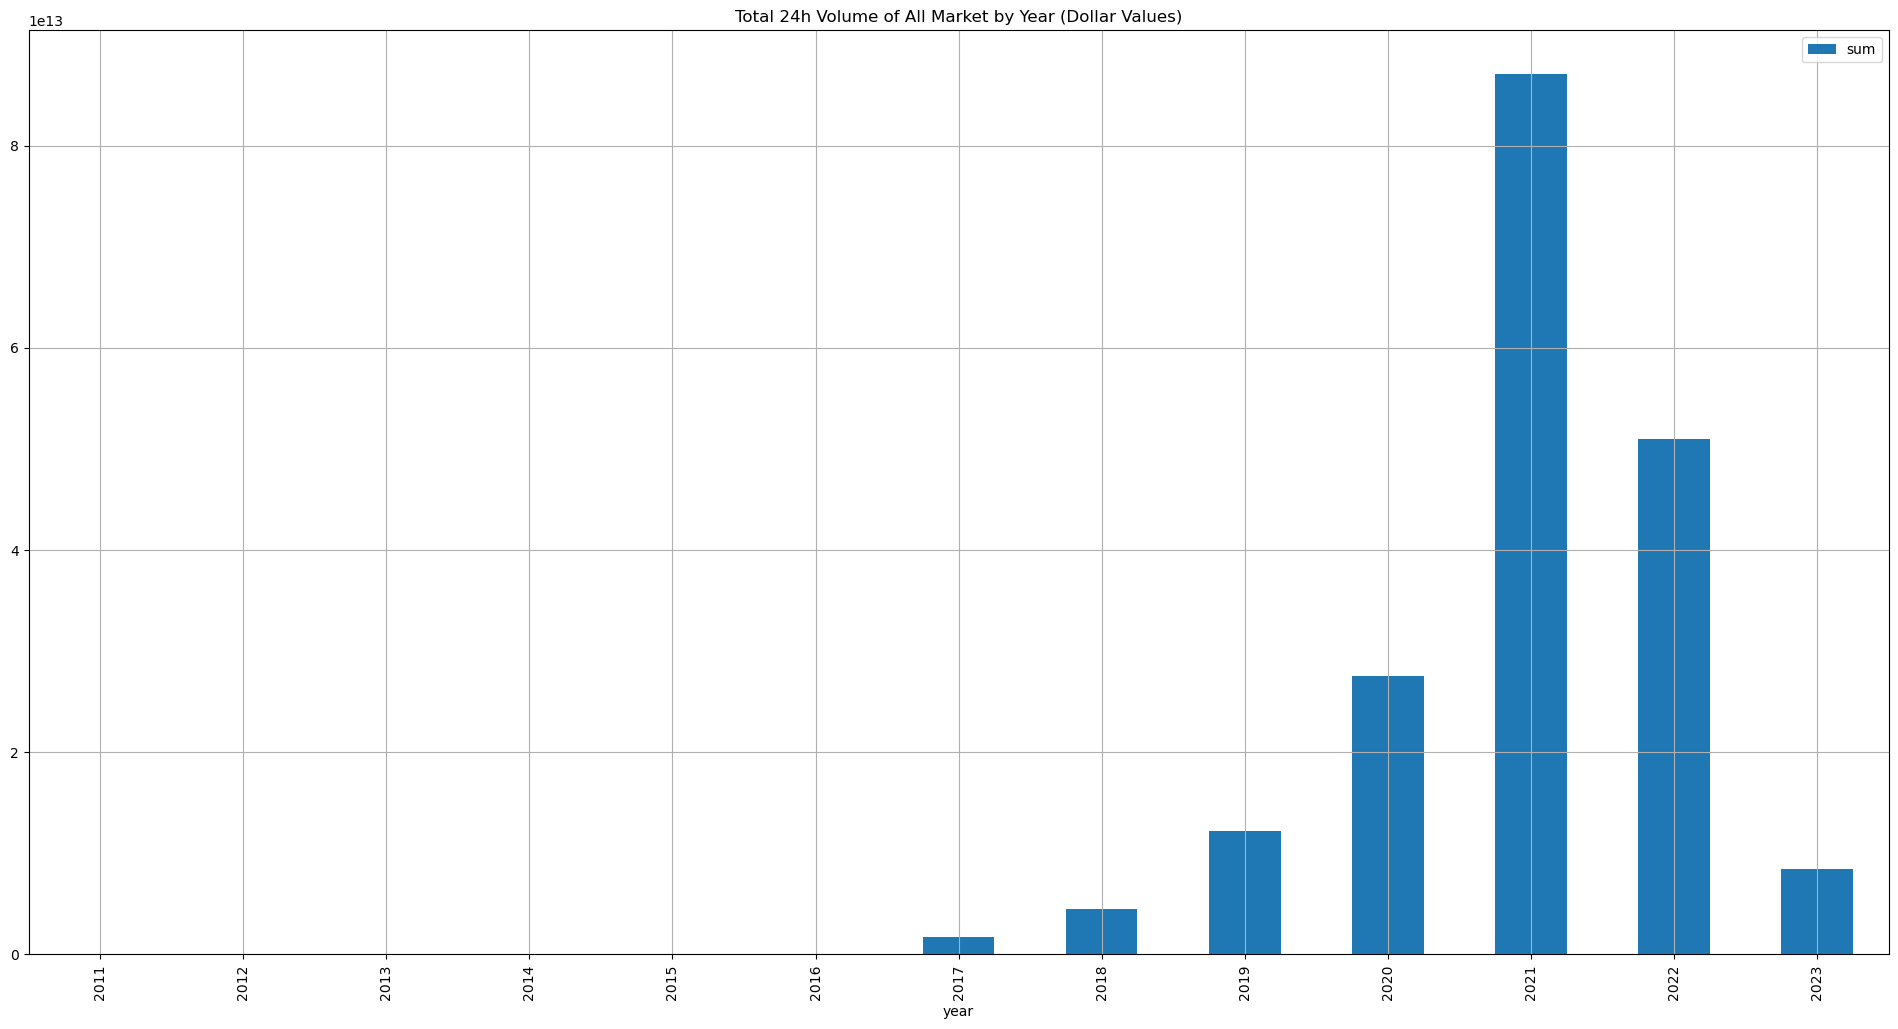

In [26]:
mean = pd.DataFrame(vol.sum(1), columns=["sum"])

mean["year"] = mean.index.year

mean.groupby("year")[["sum"]].sum().plot(kind="bar", figsize=(24,12))
plt.title("Total 24h Volume of All Market by Year (Dollar Values)")
plt.grid();

In [27]:
mean.groupby("year")[["sum"]].sum()#.quantile(0.2)

,sum
year,
2011,0.000000e+00
2012,0.000000e+00
2013,2.578811e+08
2014,1.292291e+10
2015,1.417792e+10
2016,4.256753e+10
2017,1.672546e+12
2018,4.454757e+12
2019,1.215790e+13


In [7]:
# 연도별 코인 수 찾기 (Volume이 존재하는...)
for year in ["2013","2014","2015","2016","2017","2018","2019","2020","2021","2022","2023"]:
    numbers = (len(vol.columns) - vol.loc[year].isna().sum(1)).max()
    tmp_mktcap = vol.loc[year]

    if year == "2013":
        print("year", "Number")
    print(year, numbers)

year Number
2013 33
2014 121
2015 169
2016 256
2017 582
2018 1686
2019 2863
2020 4530
2021 7266
2022 8779
2023 9000


### Volume 0 이상 마스킹

In [28]:
# 거래량이 0이상 찍힌 애들만 남겨보자
vol_mask = (vol > 0).replace({True:1,
                              False:np.nan})

mktcap_pp = mktcap * vol_mask #거래량이 0이니까 그냥 오늘 빼도 될듯
vol_pp = vol * vol_mask

mktcap_pp.isna().sum().sum() - mktcap.isna().sum().sum()

110699

마스킹 시킨 애들의 통계량 출력

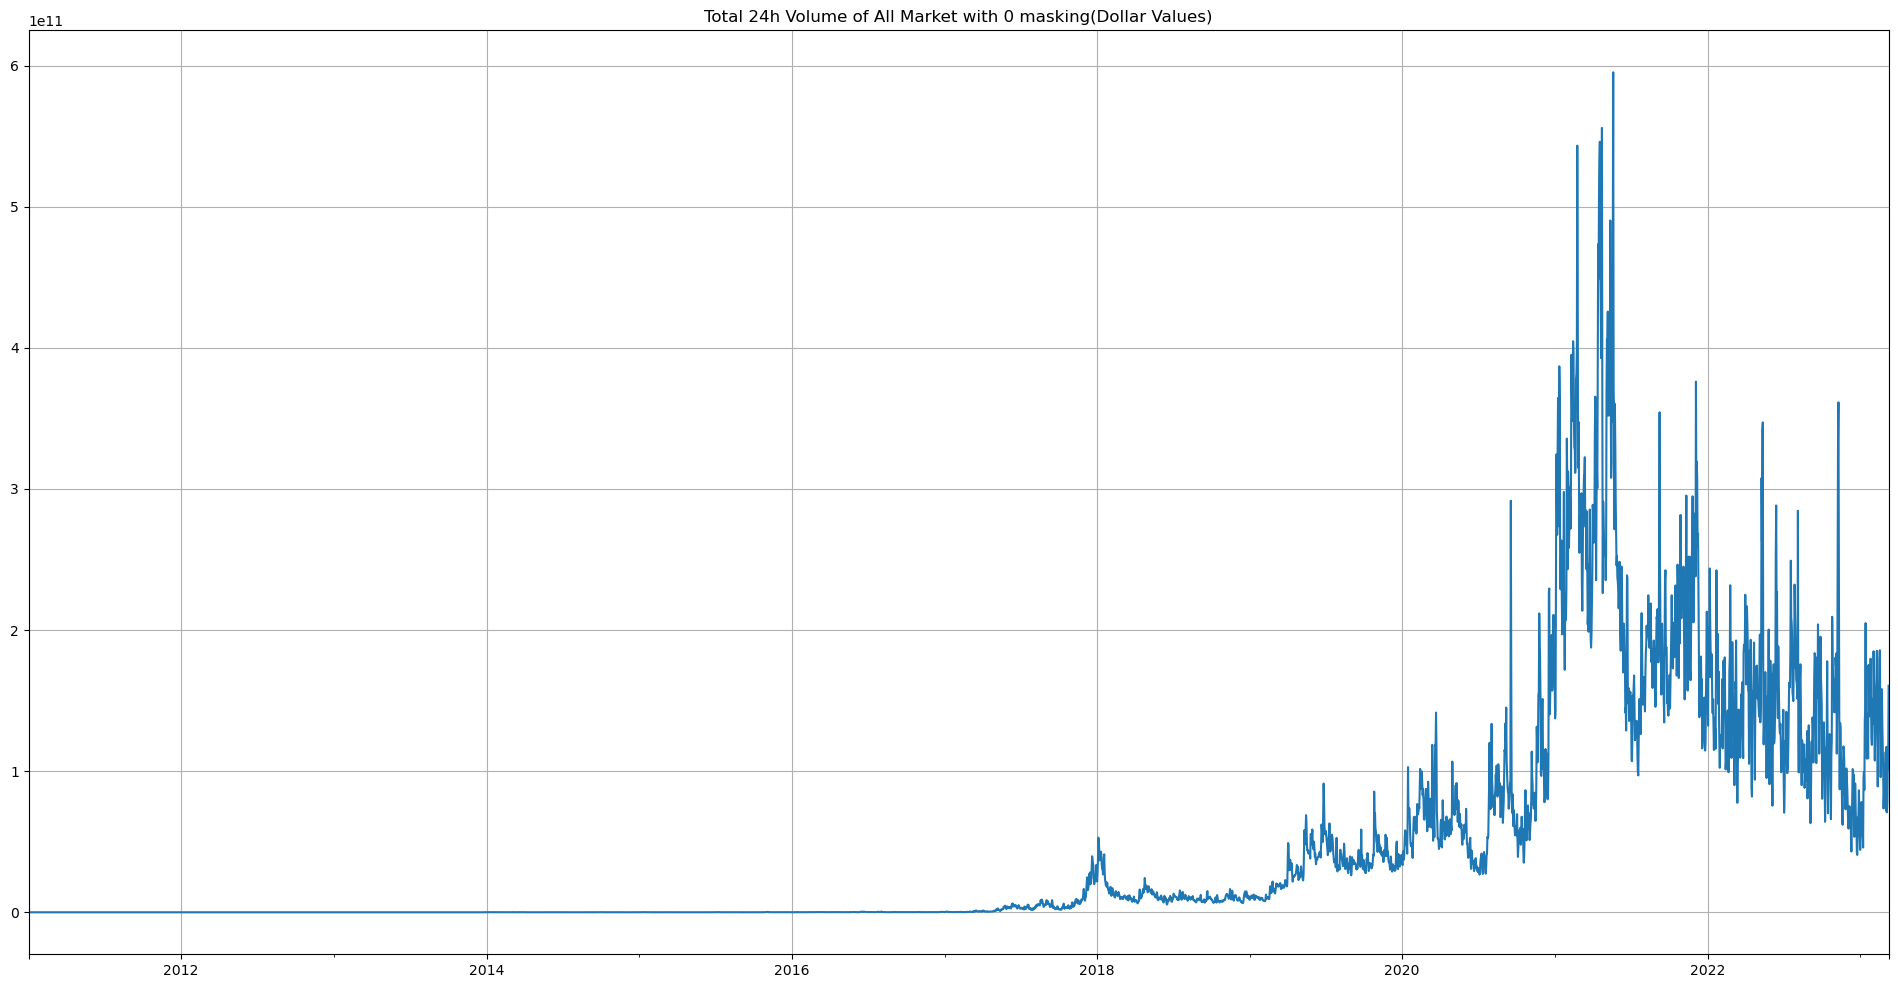

In [35]:
(vol_pp.sum(1)).plot(figsize=(24,12))
plt.title("Total 24h Volume of All Market with 0 masking(Dollar Values)")
plt.grid();

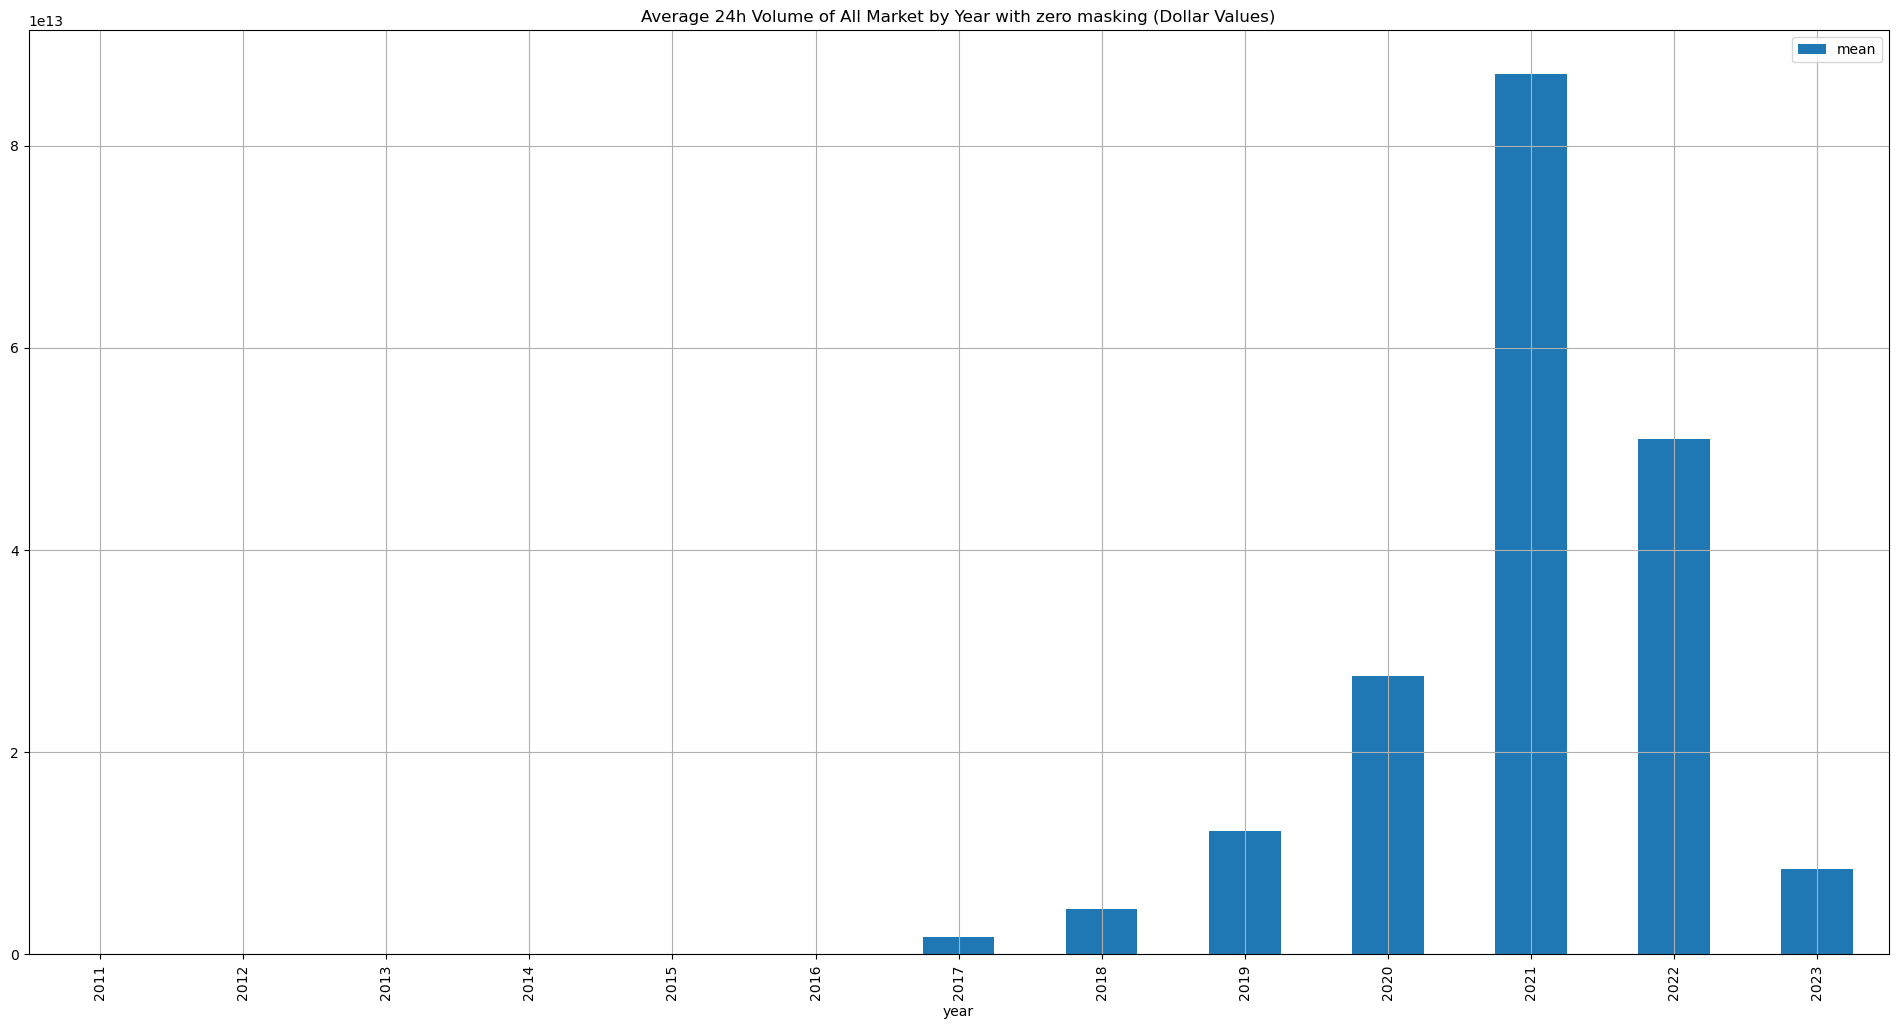

In [36]:
mean = pd.DataFrame(vol_pp.sum(1), columns=["mean"])

mean["year"] = mean.index.year

mean.groupby("year")[["mean"]].sum().plot(kind="bar", figsize=(24,12))
plt.title("Average 24h Volume of All Market by Year with zero masking (Dollar Values)")
plt.grid();

In [37]:
mean.groupby("year")[["mean"]].sum()

,mean
year,
2011,0.000000e+00
2012,0.000000e+00
2013,2.578811e+08
2014,1.292291e+10
2015,1.417792e+10
2016,4.256753e+10
2017,1.672546e+12
2018,4.454757e+12
2019,1.215790e+13


In [34]:
# 연도별 코인 수 찾기 (Volume이 존재하는...)
for year in ["2013","2014","2015","2016","2017","2018","2019","2020","2021","2022","2023"]:
    numbers = (len(vol_pp.columns) - vol_pp.loc[year].isna().sum(1)).max()
    tmp_mktcap = vol_pp.loc[year]

    if year == "2013":
        print("year", "Number")
    print(year, numbers)

year Number
2013 33
2014 121
2015 163
2016 239
2017 581
2018 1569
2019 2368
2020 3341
2021 4910
2022 5411
2023 4618
